In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
corrs = [np.load("../../pearson_corr_with_causal_hap.npy"), np.load("../../pearson_corr_with_causal_leaf.npy"), np.load("../../pearson_corr_with_root.npy")]

In [3]:
corrs[0]

array([0.25621283, 0.21558776, 0.21562694, ..., 0.35953524, 0.36127428,
       0.32192034])

In [4]:
IDs = !grep -Ev '^#' "../../out/19_45401409-46401409/genotypes/snps.pvar" | cut -f2 | tail -n+2
pos = np.array(IDs, dtype=np.uint32)
IDs = !grep -Ev '^#' "../../out/19_45401409-46401409/genotypes/snps.pvar" | cut -f3 | tail -n+2
snps = np.array(IDs, dtype="U50")

In [5]:
def get_arr(idx):
    return pd.DataFrame(np.array([snp for snp in zip(pos.tolist(), snps.tolist(), np.abs(corrs[idx].tolist()))], dtype=[("pos", np.uint32), ("id", "U50"), ("corr", np.float64)]))

In [6]:
arr = get_arr(0)
arr

,pos,id,corr
0,45401782,rs55821237,0.256213
1,45401783,rs56290633,0.215588
2,45402477,rs34878901,0.215627
3,45403412,rs1160985,0.250964
4,45403858,rs760136,0.236074
...,...,...,...
1848,46399899,rs8102437,0.316809
1849,46400135,rs141222202,0.361436
1850,46400349,rs34052846,0.316362
1851,46400443,rs34717890,0.359535


In [7]:
snp_labels = ["rs1046282", "rs4803817", "rs36046716"]

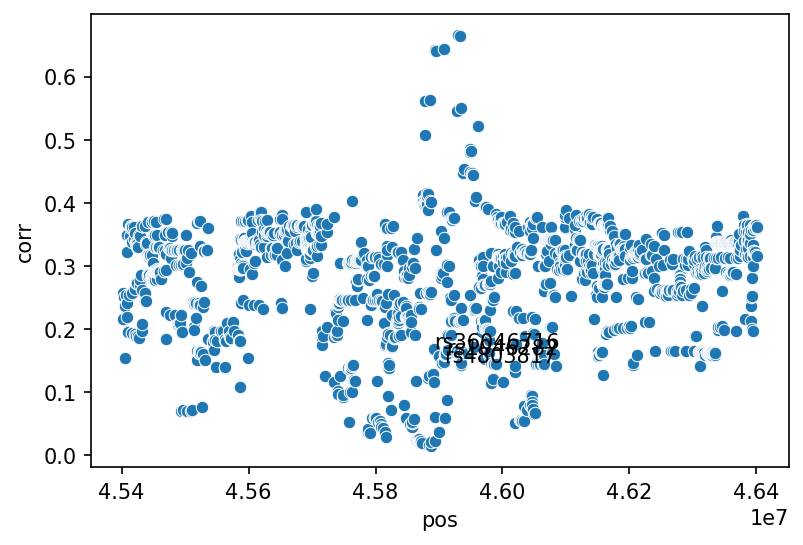

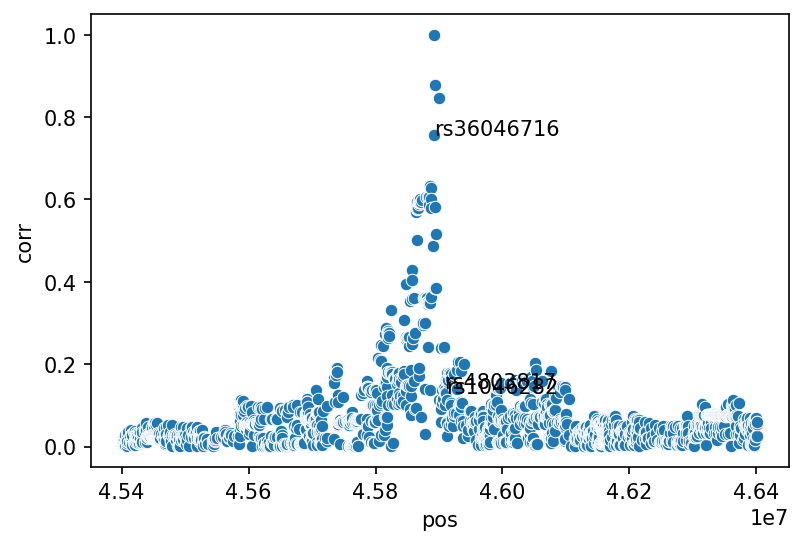

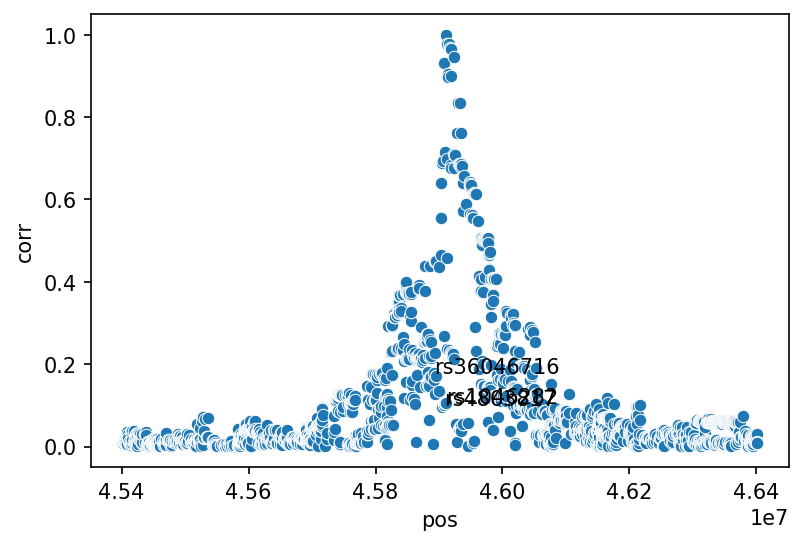

In [8]:
for idx in range(len(corrs)):
    arr = get_arr(idx)
    plt.figure(dpi=150)
    sns.scatterplot(data=arr, x="pos", y="corr")
    snp_lab = np.vectorize(lambda x: x in snp_labels)(arr["id"])
    a = pd.concat({'x': arr["pos"][snp_lab], 'y': arr["corr"][snp_lab], 'val': arr["id"][snp_lab]}, axis=1)
    for i, point in a.iterrows():
        plt.text(point['x']+.02, point['y'], str(point['val']))